In [1]:
import sys
import datetime
import pandas as pd

path_root = '../../..'
sys.path.append(f'{path_root}/')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = 'lombardia'

path_data = f'{path_root}/data'
path_img_root =  f'{path_data}/imgs/grafici/{level}/{region_name}'
path_csv = f'{path_data}/csv'
csv_in_name = f'{path_csv}/{level}/covid19-{region_name}.csv'

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,3,Lombardia,79,25,104,127,231,65,68,...,3.0,2237.0,0.0,56.0,24.04,45.02,3.04,0.00,31.58,39.16
1,2020-02-26T18:00:00,3,Lombardia,79,25,104,145,249,18,18,...,0.0,-492.0,0.0,18.0,24.04,41.77,-3.66,0.00,0.00,7.79
2,2020-02-27T18:00:00,3,Lombardia,172,41,213,136,349,100,145,...,5.0,112.0,0.0,-9.0,19.25,61.03,129.46,0.00,64.00,40.16
3,2020-02-28T18:00:00,3,Lombardia,235,47,282,192,474,125,128,...,3.0,1515.0,0.0,56.0,16.67,59.49,8.45,0.00,14.63,35.82
4,2020-02-29T17:00:00,3,Lombardia,256,80,336,216,552,78,84,...,6.0,888.0,0.0,24.0,23.81,60.87,9.46,0.00,70.21,16.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,2021-02-17T17:00:00,3,Lombardia,3740,363,4103,44590,48693,20,1764,...,29.0,38296.0,9069.0,-17.0,8.85,8.43,4.61,19.45,-2.68,0.04
359,2021-02-18T17:00:00,3,Lombardia,3716,368,4084,45889,49973,1280,2540,...,55.0,42508.0,11584.0,1299.0,9.01,8.17,5.98,21.93,1.38,2.63
360,2021-02-19T17:00:00,3,Lombardia,3733,373,4106,47683,51789,1816,3724,...,33.0,51894.0,15863.0,1794.0,9.08,7.93,7.18,23.48,1.36,3.63
361,2021-02-20T17:00:00,3,Lombardia,3722,382,4104,49261,53365,1576,3019,...,37.0,44012.0,13948.0,1578.0,9.31,7.69,6.86,21.64,2.41,3.04


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 2, 21, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 3) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 2514
Nuovi tamponi: 33148.0
Percentuale nuovi positivi/nuovi tamponi: 7.6 %
Nuovi guariti: 784.0
Nuovi deceduti: 50.0
Variazione positivi ricoverati con sintomi: 19.0
Variazione positivi in terapia intensiva: 4.0
Variazione positivi in isolamento dimiciliare: 1657.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 2, 21, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-12-23T17:00:00,3,Lombardia,4243,536,4779,55460,60239,-905,2153,...,98.0,32926.0,10232.0,-854.0,11.22,7.93,6.54,21.04,-0.74,-1.48
1,2020-12-24T17:00:00,3,Lombardia,4178,521,4699,53209,57908,-2331,2656,...,67.0,32294.0,10934.0,-2251.0,11.09,8.11,8.22,24.29,-2.80,-3.87
2,2020-12-25T17:00:00,3,Lombardia,3976,522,4498,54212,58710,802,2628,...,105.0,27942.0,9754.0,1003.0,11.61,7.66,9.41,26.94,0.19,1.38
3,2020-12-26T17:00:00,3,Lombardia,3839,513,4352,55270,59622,912,1606,...,36.0,15337.0,5996.0,1058.0,11.79,7.30,10.47,26.78,-1.72,1.55
4,2020-12-27T17:00:00,3,Lombardia,3801,508,4309,55018,59327,-295,466,...,49.0,4901.0,2014.0,-252.0,11.79,7.26,9.51,23.14,-0.97,-0.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2021-02-17T17:00:00,3,Lombardia,3740,363,4103,44590,48693,20,1764,...,29.0,38296.0,9069.0,-17.0,8.85,8.43,4.61,19.45,-2.68,0.04
57,2021-02-18T17:00:00,3,Lombardia,3716,368,4084,45889,49973,1280,2540,...,55.0,42508.0,11584.0,1299.0,9.01,8.17,5.98,21.93,1.38,2.63
58,2021-02-19T17:00:00,3,Lombardia,3733,373,4106,47683,51789,1816,3724,...,33.0,51894.0,15863.0,1794.0,9.08,7.93,7.18,23.48,1.36,3.63
59,2021-02-20T17:00:00,3,Lombardia,3722,382,4104,49261,53365,1576,3019,...,37.0,44012.0,13948.0,1578.0,9.31,7.69,6.86,21.64,2.41,3.04


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

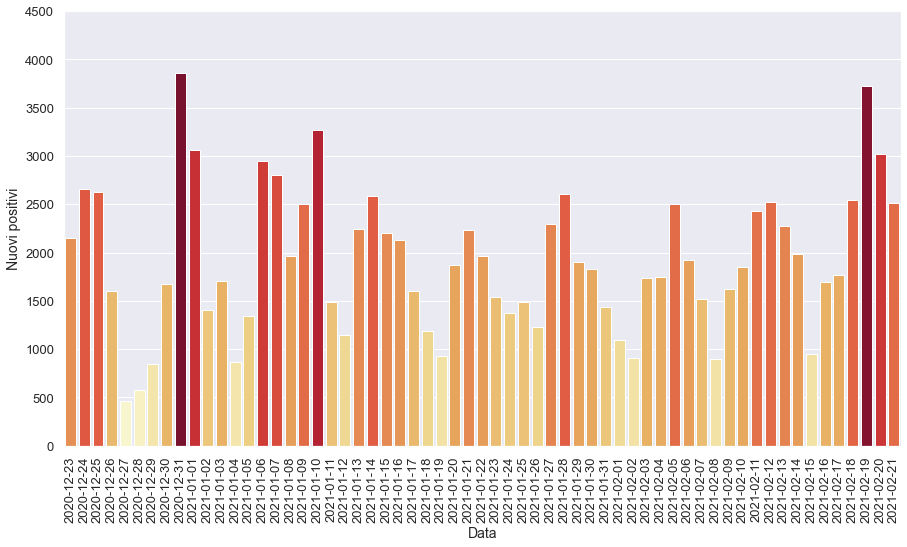

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

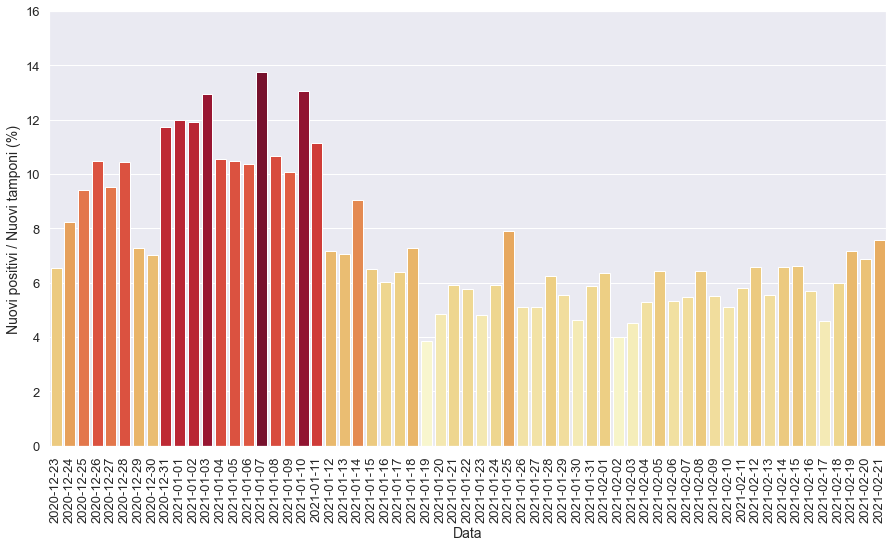

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

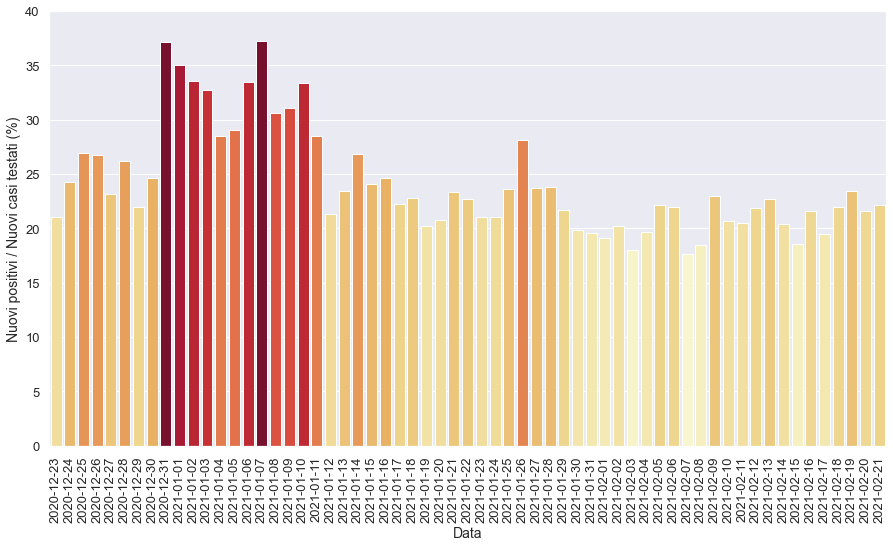

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

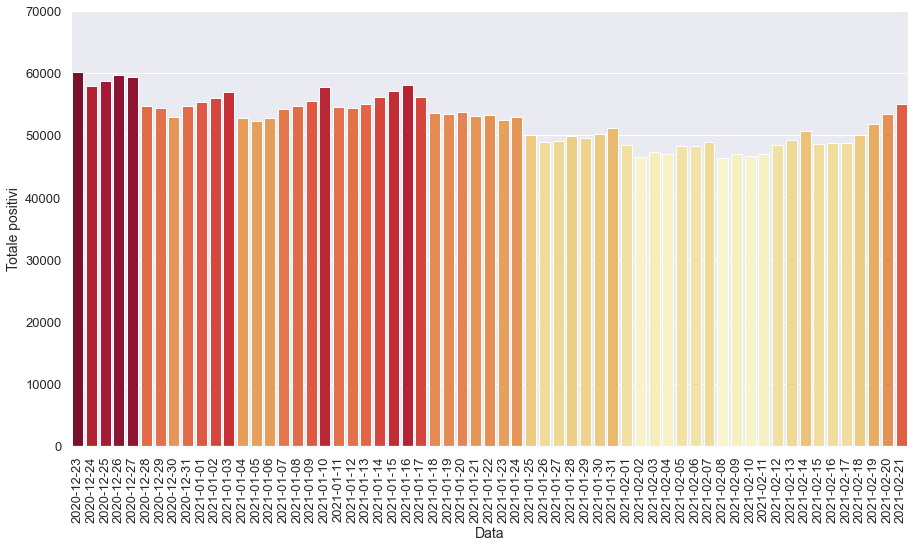

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

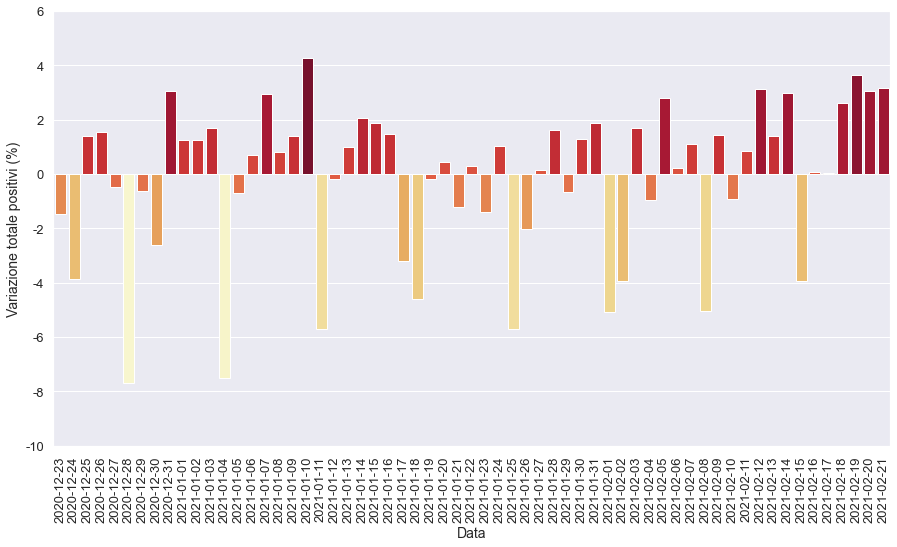

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

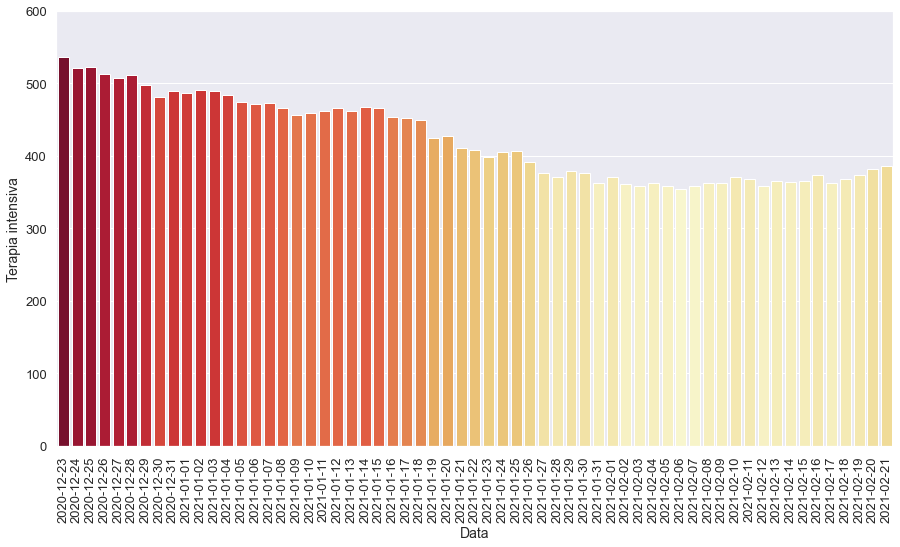

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

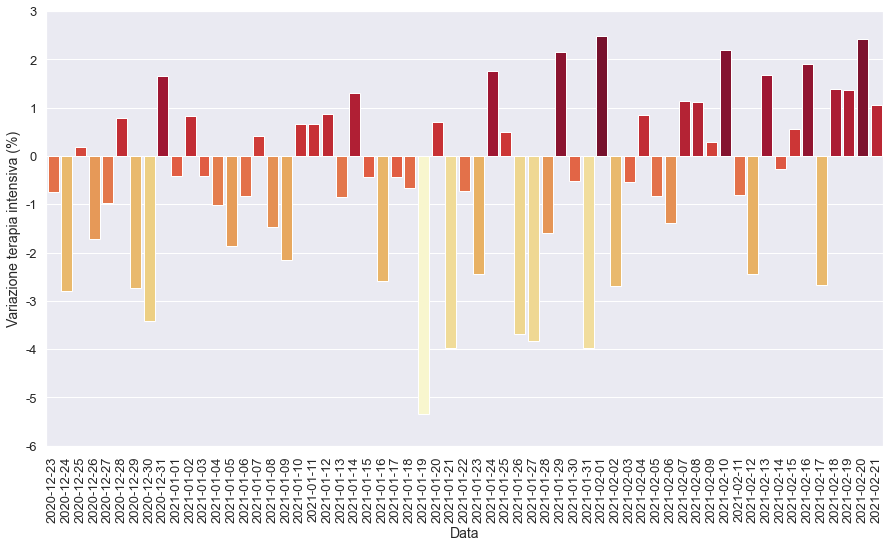

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

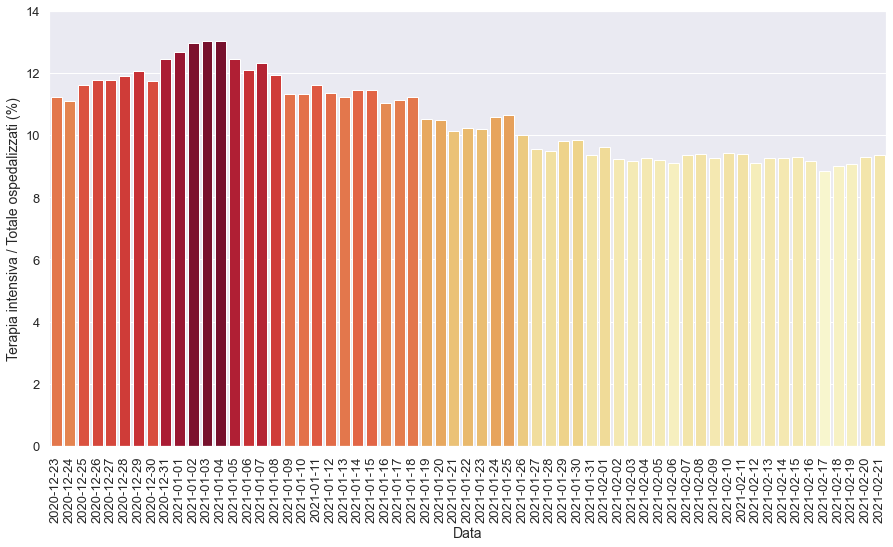

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

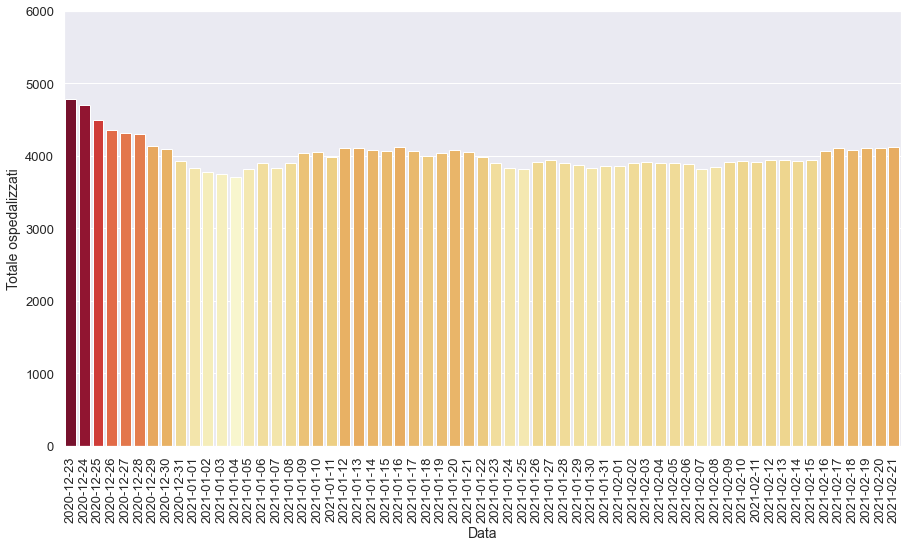

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

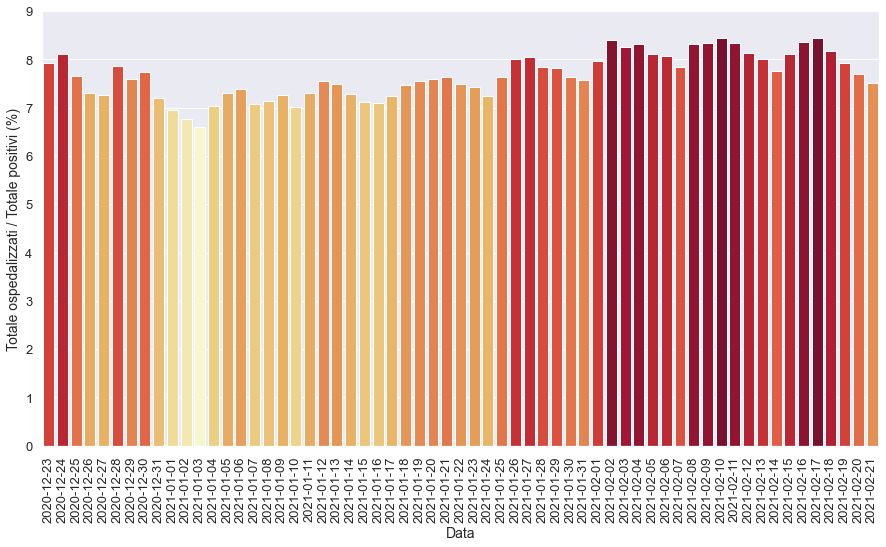

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

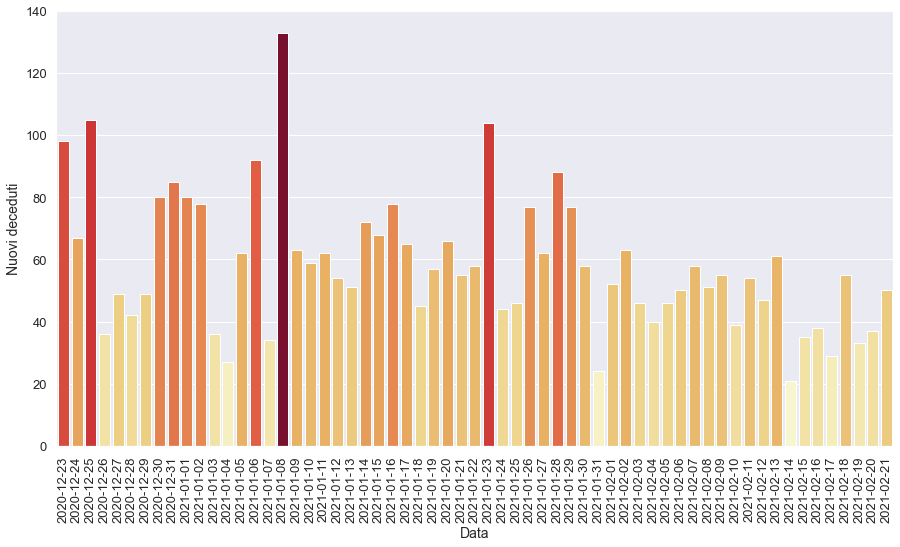

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

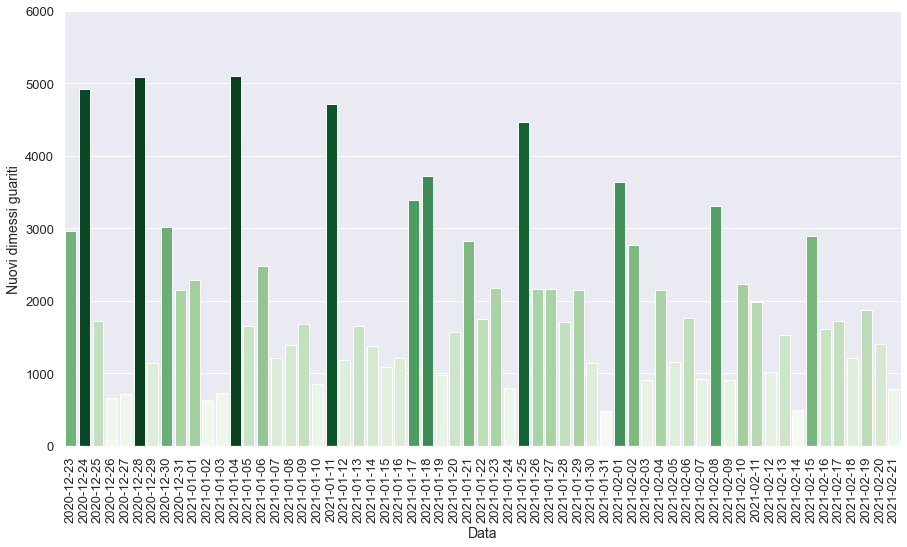

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-01-22T17:00:00,3,Lombardia,3579,408,3987,49228,53215,160,1969,...,58.0,34056.0,8674.0,228.0,10.23,7.49,5.78,22.70,-0.73,0.30
1,2021-01-23T17:00:00,3,Lombardia,3499,398,3897,48571,52468,-747,1535,...,104.0,31809.0,7294.0,-657.0,10.21,7.43,4.83,21.04,-2.45,-1.40
2,2021-01-24T17:00:00,3,Lombardia,3428,405,3833,49171,53004,536,1375,...,44.0,23182.0,6530.0,600.0,10.57,7.23,5.93,21.06,1.76,1.02
3,2021-01-25T17:00:00,3,Lombardia,3412,407,3819,46158,49977,-3027,1484,...,46.0,18777.0,6287.0,-3013.0,10.66,7.64,7.90,23.60,0.49,-5.71
4,2021-01-26T17:00:00,3,Lombardia,3530,392,3922,45046,48968,-1009,1230,...,77.0,24040.0,4376.0,-1112.0,9.99,8.01,5.12,28.11,-3.69,-2.02
5,2021-01-27T17:00:00,3,Lombardia,3573,377,3950,45088,49038,70,2293,...,62.0,44809.0,9661.0,42.0,9.54,8.05,5.12,23.73,-3.83,0.14
6,2021-01-28T17:00:00,3,Lombardia,3537,371,3908,45931,49839,801,2603,...,88.0,41677.0,10916.0,843.0,9.49,7.84,6.25,23.85,-1.59,1.63
7,2021-01-29T17:00:00,3,Lombardia,3490,379,3869,45645,49514,-325,1900,...,77.0,34156.0,8748.0,-286.0,9.80,7.81,5.56,21.72,2.16,-0.65
8,2021-01-30T17:00:00,3,Lombardia,3454,377,3831,46310,50141,627,1832,...,58.0,39462.0,9230.0,665.0,9.84,7.64,4.64,19.85,-0.53,1.27
9,2021-01-31T17:00:00,3,Lombardia,3503,362,3865,47212,51077,936,1438,...,24.0,24494.0,7364.0,902.0,9.37,7.57,5.87,19.53,-3.98,1.87


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

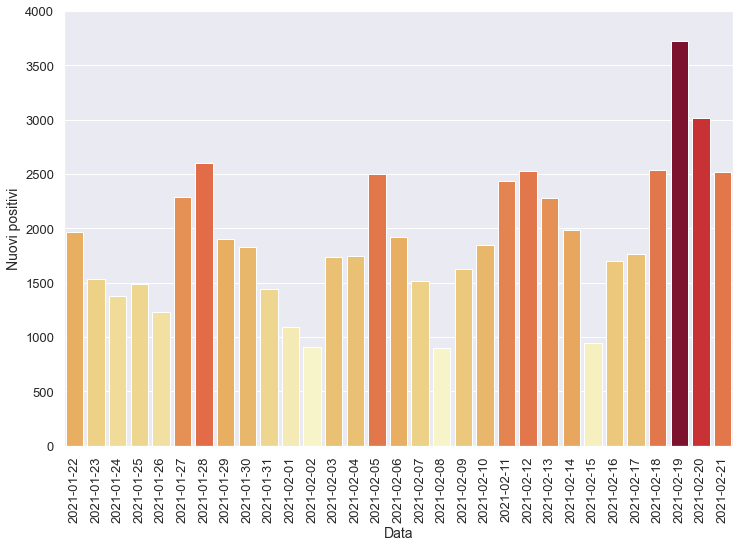

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

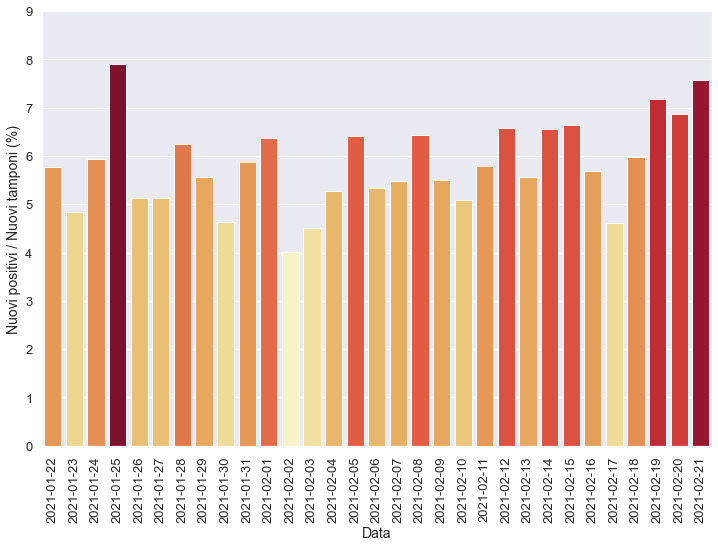

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

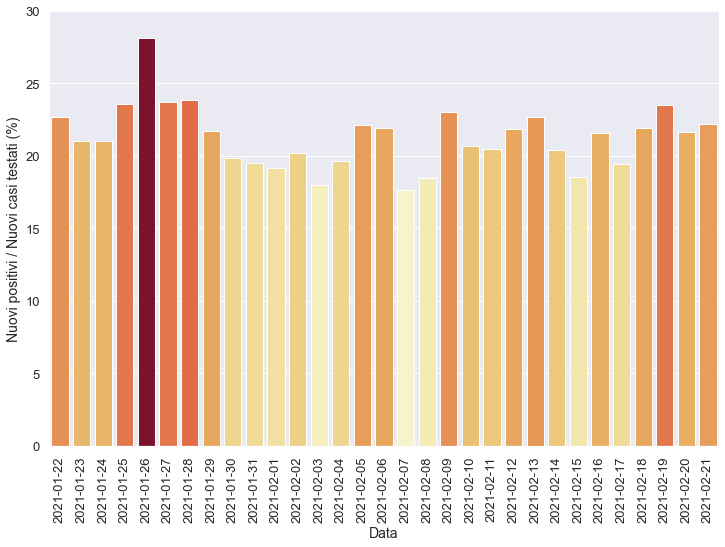

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

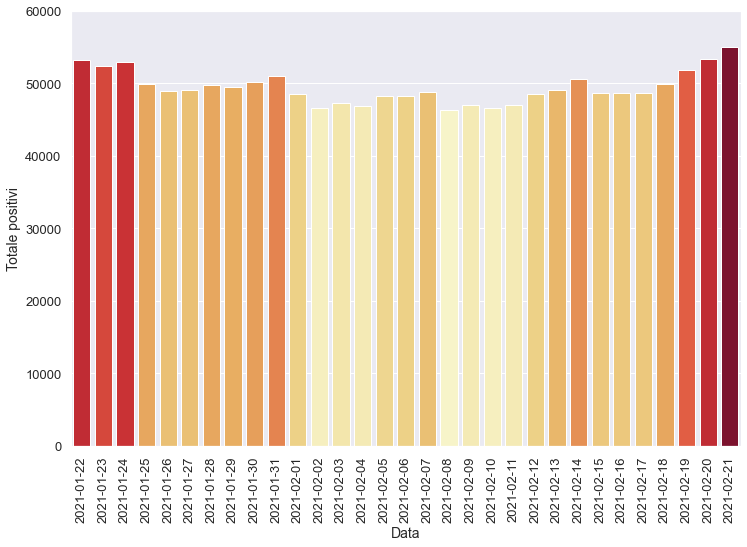

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

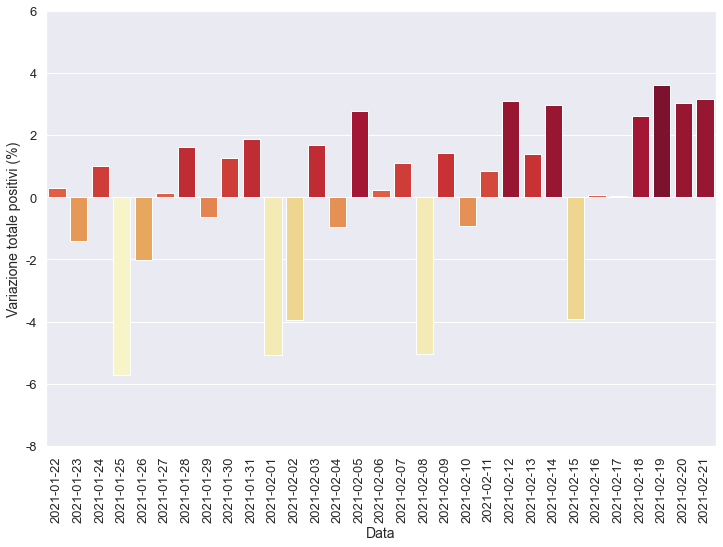

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

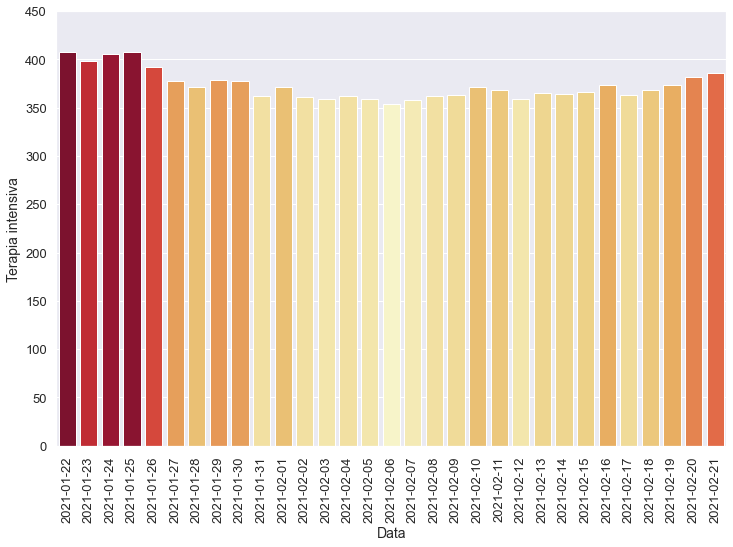

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

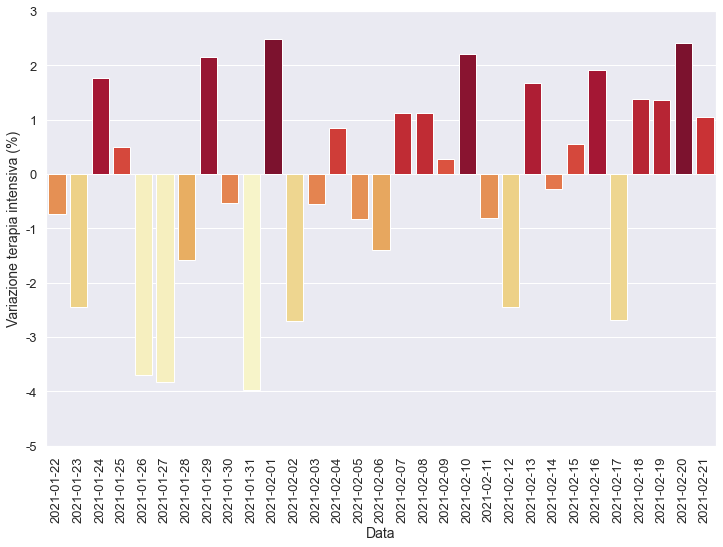

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

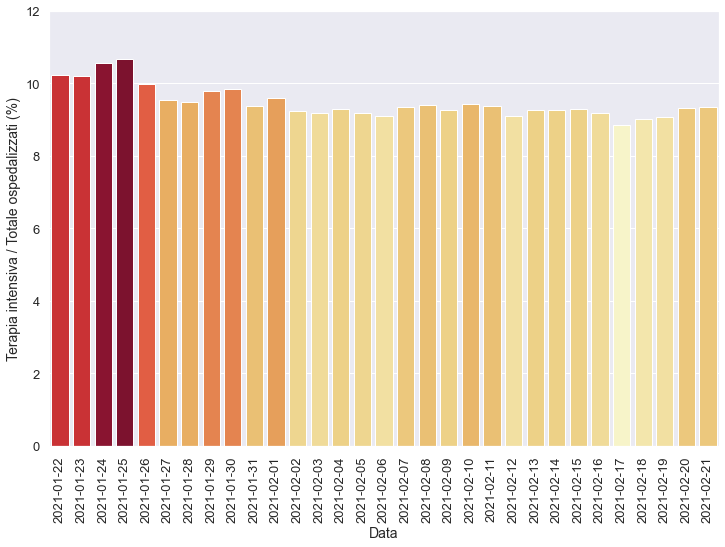

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

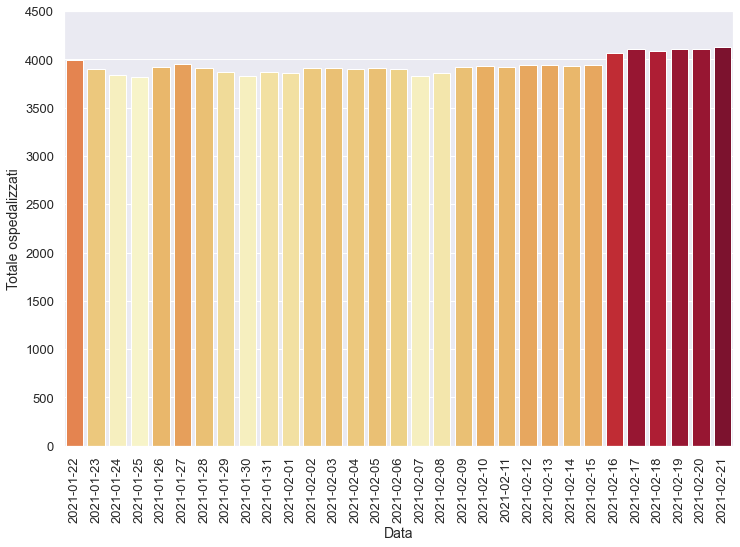

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

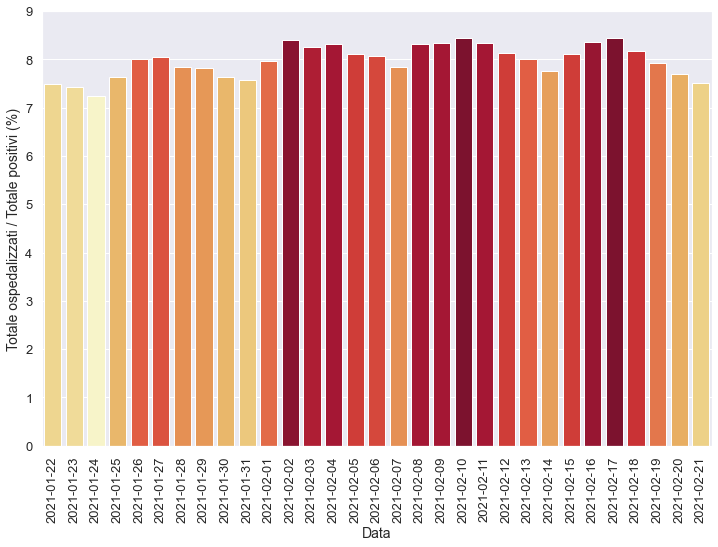

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

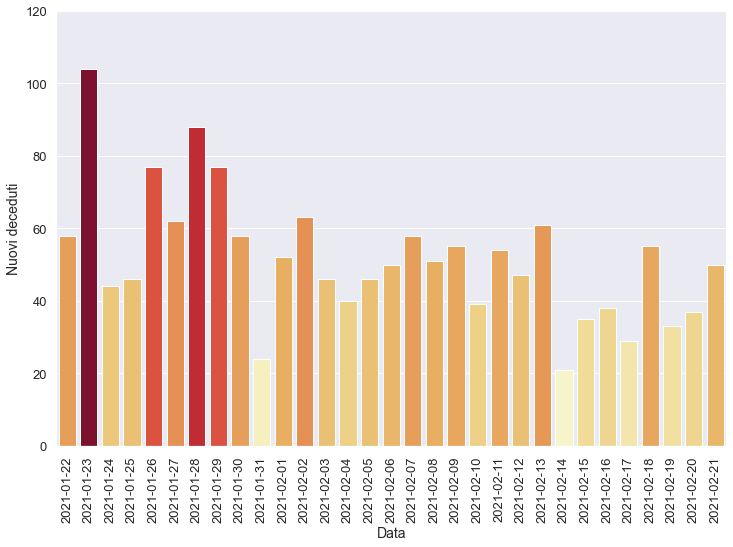

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

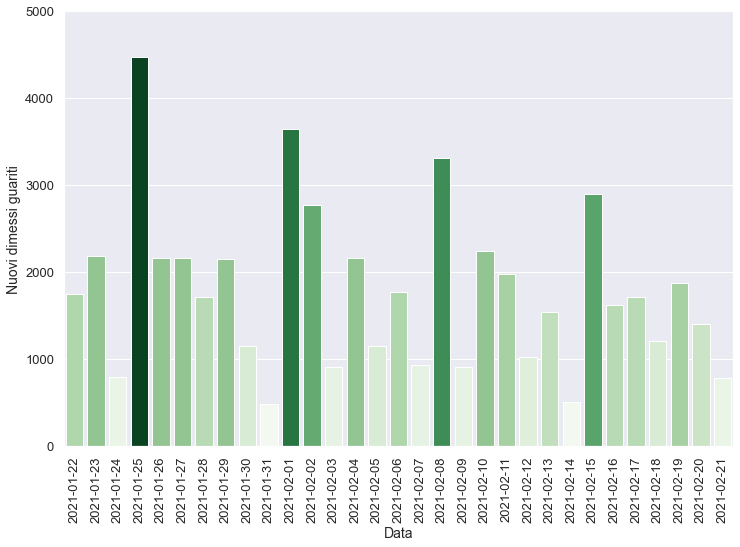

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-02-14T17:00:00,3,Lombardia,3562,364,3926,46691,50617,1466,1987,...,21.0,30289.0,9722.0,1479.0,9.27,7.76,6.56,20.44,-0.27,2.98
1,2021-02-15T17:00:00,3,Lombardia,3572,366,3938,44692,48630,-1987,945,...,35.0,14260.0,5103.0,-1999.0,9.29,8.10,6.63,18.52,0.55,-3.93
2,2021-02-16T17:00:00,3,Lombardia,3693,373,4066,44607,48673,43,1696,...,38.0,29846.0,7853.0,-85.0,9.17,8.35,5.68,21.60,1.91,0.09
3,2021-02-17T17:00:00,3,Lombardia,3740,363,4103,44590,48693,20,1764,...,29.0,38296.0,9069.0,-17.0,8.85,8.43,4.61,19.45,-2.68,0.04
4,2021-02-18T17:00:00,3,Lombardia,3716,368,4084,45889,49973,1280,2540,...,55.0,42508.0,11584.0,1299.0,9.01,8.17,5.98,21.93,1.38,2.63
5,2021-02-19T17:00:00,3,Lombardia,3733,373,4106,47683,51789,1816,3724,...,33.0,51894.0,15863.0,1794.0,9.08,7.93,7.18,23.48,1.36,3.63
6,2021-02-20T17:00:00,3,Lombardia,3722,382,4104,49261,53365,1576,3019,...,37.0,44012.0,13948.0,1578.0,9.31,7.69,6.86,21.64,2.41,3.04
7,2021-02-21T17:00:00,3,Lombardia,3741,386,4127,50918,55045,1680,2514,...,50.0,33148.0,11331.0,1657.0,9.35,7.50,7.58,22.19,1.05,3.15


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

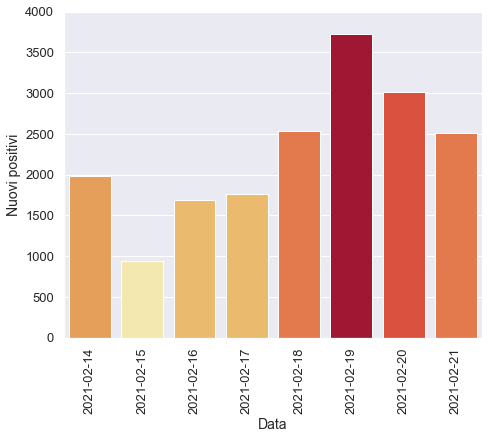

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

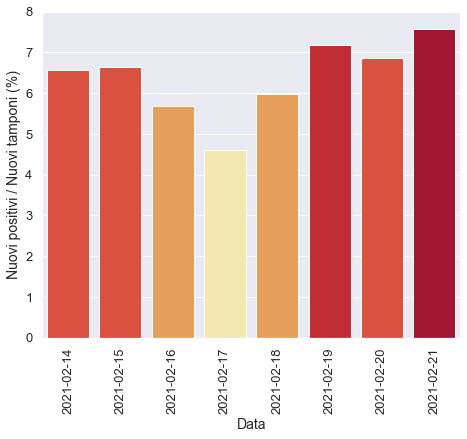

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

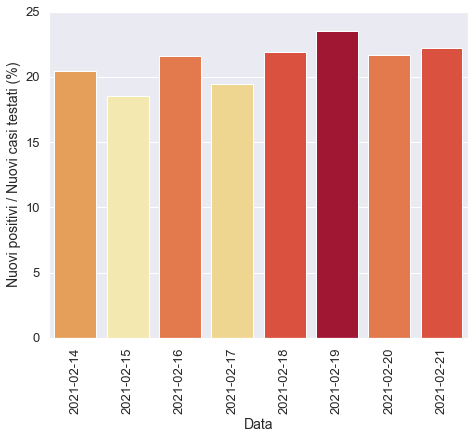

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

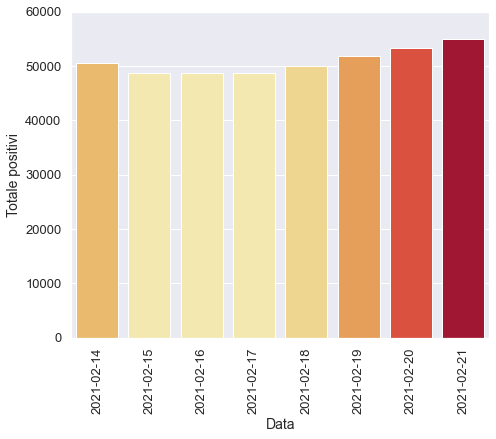

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

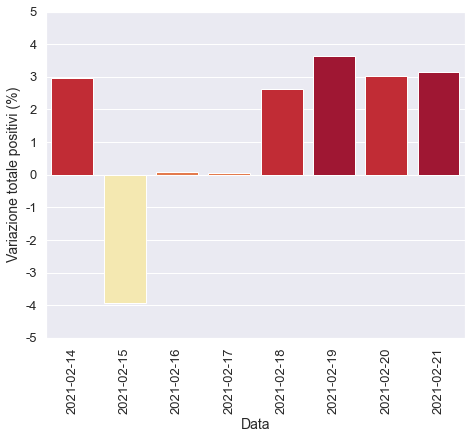

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

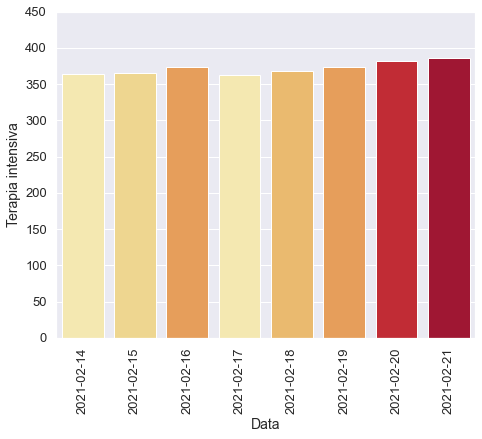

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

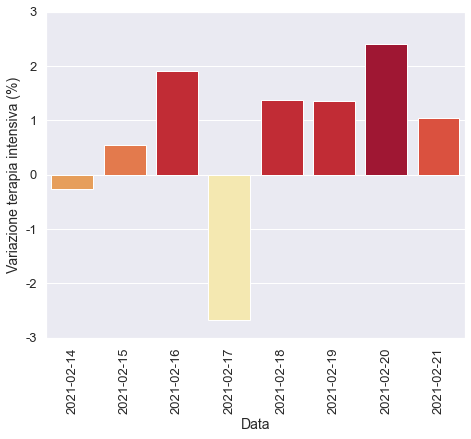

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

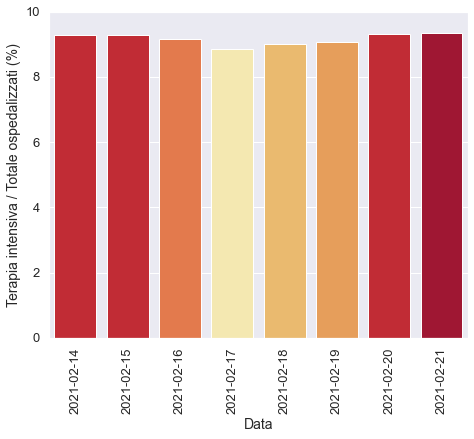

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

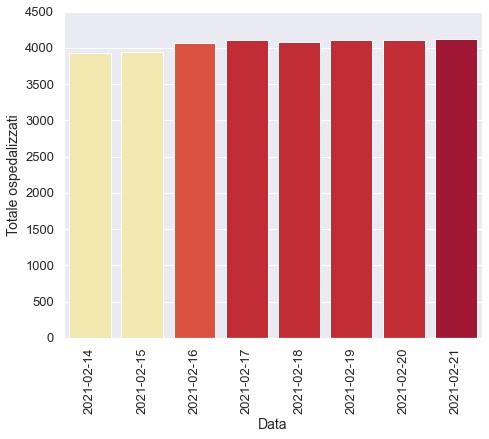

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

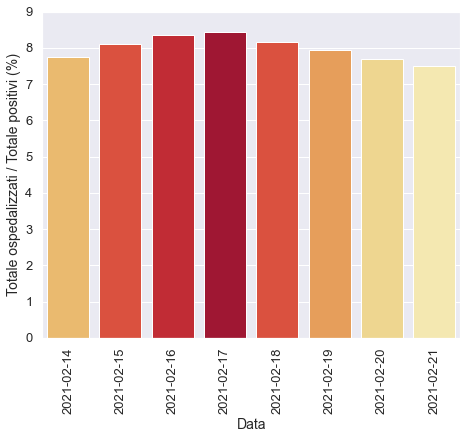

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

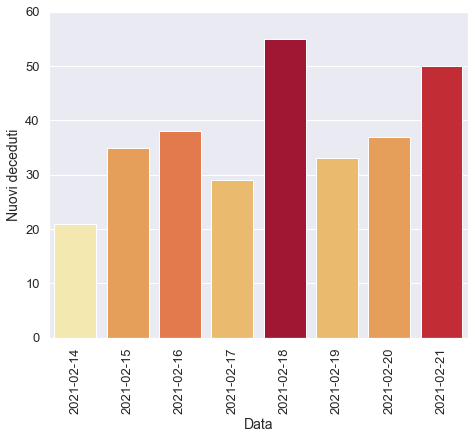

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

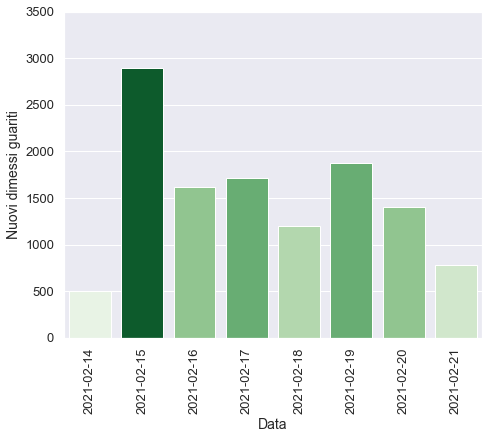

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)